In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

,Extent,Date
0,376618.799,1979-01-01
1,211788.726,1979-02-01
2,262868.141,1979-03-01
3,698377.304,1979-04-01
4,1252407.727,1979-05-01
...,...,...
533,1520776.003,2023-06-01
534,2076164.165,2023-07-01
535,2731799.027,2023-08-01
536,3179384.692,2023-09-01


In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 7
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((520, 12, 1), (520,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT7/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.3440 - root_mean_squared_error: 0.5865

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 8s 90ms/step - loss: 0.3358 - root_mean_squared_error: 0.5795 - val_loss: 0.2289 - val_root_mean_squared_error: 0.4784
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.1764 - root_mean_squared_error: 0.4200

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1776 - root_mean_squared_error: 0.4214 - val_loss: 0.1788 - val_root_mean_squared_error: 0.4229
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1289 - root_mean_squared_error: 0.3590

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1289 - root_mean_squared_error: 0.3591 - val_loss: 0.1508 - val_root_mean_squared_error: 0.3884
Epoch 4/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1064 - root_mean_squared_error: 0.3262

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1064 - root_mean_squared_error: 0.3261 - val_loss: 0.1299 - val_root_mean_squared_error: 0.3604
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0819 - root_mean_squared_error: 0.2863

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0834 - root_mean_squared_error: 0.2887 - val_loss: 0.1142 - val_root_mean_squared_error: 0.3379
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0595 - root_mean_squared_error: 0.2439

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0607 - root_mean_squared_error: 0.2463 - val_loss: 0.0990 - val_root_mean_squared_error: 0.3146
Epoch 7/50
53/53 [==============================] - ETA: 0s - loss: 0.0489 - root_mean_squared_error: 0.2211

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0489 - root_mean_squared_error: 0.2211 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2878
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0379 - root_mean_squared_error: 0.1946

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0399 - root_mean_squared_error: 0.1997 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2697
Epoch 9/50
52/53 [============================>.] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.1917

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0503 - val_root_mean_squared_error: 0.2242
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0279 - root_mean_squared_error: 0.1671

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0270 - root_mean_squared_error: 0.1642 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2002
Epoch 11/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1650

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0247 - root_mean_squared_error: 0.1572 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1619
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1344

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 13/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1290

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0923
Epoch 14/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1142

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 15/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1098

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0649
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 17/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1150

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 19/50
53/53 [==============================] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1254

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 20/50
52/53 [============================>.] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1190

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1093 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0197 - root_mean_squared_error: 0.1404 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0030 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0163 - root_mean_squared_error: 0.1276 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0171 - root_mean_squared_error: 0.1309 - val_loss: 0.0043 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT7\assets


INFO:tensorflow:Assets written to: Indian_model_LT7\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0179 - root_mean_squared_error: 0.1340 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0418


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.7225706378618877 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

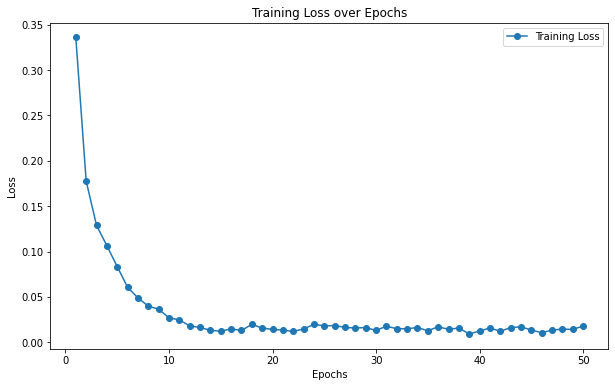

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

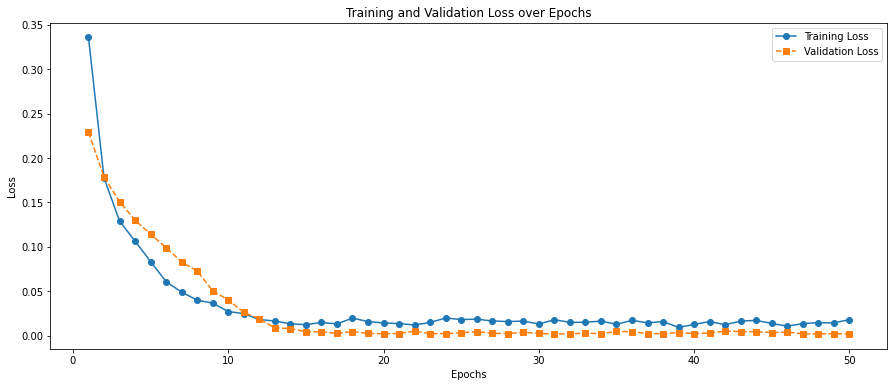

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT7/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.06621822969121374
MAE : 0.05456645234386282


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.121743e+06,2526913.818
1,1.385298e+06,1128752.378
2,4.844726e+05,522831.371
3,1.918152e+05,346601.304
4,-7.403092e+04,444914.605
5,5.243725e+05,827036.916
6,9.587589e+05,1142021.216
7,1.866189e+06,1885693.654
8,2.597300e+06,2542569.663
9,3.031969e+06,3107373.845


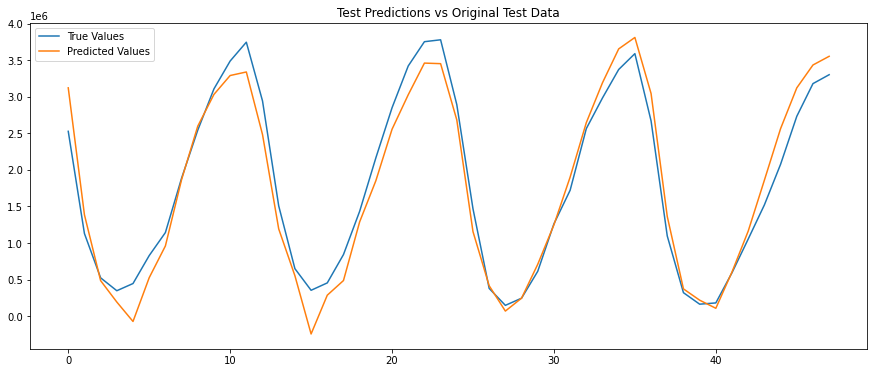

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

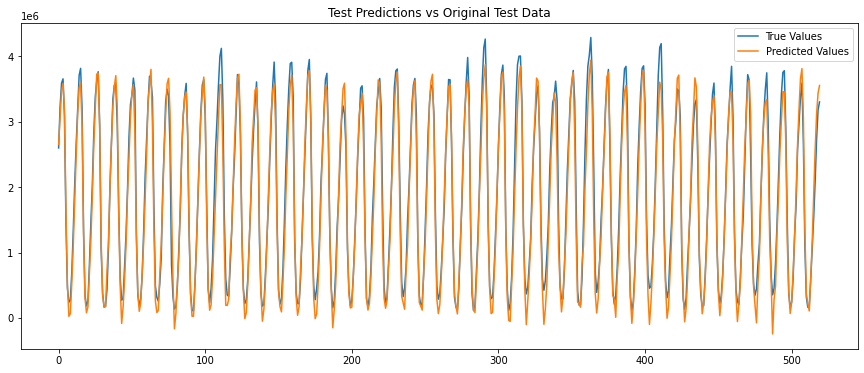

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()